# Kepler data project

Data preparation. Read scrape1.py file for know more detailes.Open and read csv file

#https://exoplanetarchive.ipac.caltech.edu/applications/DocSet/index.html?doctree=/docs/docmenu.xml&startdoc=1
Scaled planetary parameters combine the dimensionless fit parameters with physical stellar parameters to produce planet 
characteristics in physical units.

koi_teq    Equilibrium Temperature (Kelvin)Approximation for the temperature of the planet. The calculation of equilibrium 
temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) 
a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star 
are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.

koi_insol  Insolation Flux [Earth flux] Insolation flux is another way to give the equilibrium temperature. It depends on the 
stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in 
units relative to those measured for the Earth from the Sun.

koi_prad  Planetary Radius (Earth radii)The radius of the planet. Planetary radius is the product of the planet star radius 
ratio and the stellar radius.

koi_depth Transit Depth (parts per million)	The fraction of stellar flux lost at the minimum of the planetary transit. Transit 
depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light 
curve, assuming a linear orbital ephemeris.

koi_impact  Impact Parameter The sky-projected distance between the center of the stellar disc and the center of the planet 
disc at conjunction, normalized by the stellar radius.

koi_steff Stellar Effective Temperature (Kelvin) The photospheric temperature of the star.

koi_slogg Stellar Surface Gravity (log10(cm s-2)The base-10 logarithm of the acceleration due to gravity at the surface of the 
star.

koi_kepmag Kepler-band (mag) -- KIC parameter

koi_disposition Exoplanet Archive Disposition The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE,FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED. All KOIs marked as CONFIRMED are also listed in the Exoplanet Archive Confirmed Planet table. Designations of CANDIDATE, FALSE POSITIVE, and NOT DISPOSITIONED are taken from the Disposition Using Kepler Data.                                   
Full list of parameters: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html#id_col

Let's pick out groups of parameter based on temperature and distance between star/planet. After that create and evaluate prediction model of CONFIRMED and CANDIDATE objects.
                                   

In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


pd.read_csv('C:\\Users\\user\\kepler\\output.csv')

,Unnamed: 0,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
3,3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,4.564,0.053,-0.168,0.791,0.201,-0.067,19h02m08.31s,+48d17m06.8s,15.597,NaN
4,4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9559,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,4.529,0.035,-0.196,0.903,0.237,-0.079,19h48m45.30s,+47d05m37.7s,14.082,NaN
9560,9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,4.444,0.056,-0.224,1.031,0.341,-0.114,19h06m02.25s,+47d09m47.6s,14.757,NaN
9561,9561,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,4.447,0.056,-0.224,1.041,0.341,-0.114,19h36m39.57s,+47d10m34.6s,15.385,NaN
9562,9562,10155286,K07988.01,NaN,CANDIDATE,CANDIDATE,0.092,0,0,0,...,2.992,0.030,-0.027,7.824,0.223,-1.896,19h47m03.09s,+47d08m42.5s,10.998,NaN


In [15]:
data = pd.read_csv('C:\\Users\\user\\kepler\\output.csv')

Count 'kepid' value

In [16]:
data['kepoi_name'].is_unique

True

In [17]:
data['kepid'].value_counts()

11968463    7
11442793    7
10187017    6
11709124    6
6541920     6
           ..
10405482    1
6755944     1
9397862     1
10973583    1
11099109    1
Name: kepid, Length: 8214, dtype: int64

In [18]:
data['koi_disposition'].value_counts()

FALSE POSITIVE    4840
CANDIDATE         2366
CONFIRMED         2358
Name: koi_disposition, dtype: int64

In [25]:
data_cc = data[data['koi_disposition'] !='FALSE POSITIVE']

In [26]:
data_cc

,Unnamed: 0,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
4,4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN
5,5,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,9538,9938836,K07978.01,NaN,CANDIDATE,CANDIDATE,0.843,0,0,0,...,3.890,0.405,-0.135,2.219,0.536,-0.996,19h01m13.84s,+46d49m47.3s,13.729,NaN
9542,9542,10011213,K07982.01,NaN,CANDIDATE,CANDIDATE,0.189,0,0,0,...,4.488,0.054,-0.216,0.955,0.291,-0.097,19h26m25.09s,+46d58m23.8s,15.632,NaN
9552,9552,10028127,K08193.01,NaN,CANDIDATE,CANDIDATE,0.519,0,0,0,...,4.561,0.030,-0.170,0.855,0.207,-0.069,19h50m56.16s,+46d57m41.5s,15.719,NaN
9560,9560,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,4.444,0.056,-0.224,1.031,0.341,-0.114,19h06m02.25s,+47d09m47.6s,14.757,NaN


In [28]:
mymap = {"CANDIDATE": 0, "CONFIRMED": 1}

data_cc.applymap(lambda s: mymap.get(s) if s in mymap else s)

,Unnamed: 0,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra_str,dec_str,koi_kepmag,koi_kepmag_err
0,0,10797460,K00752.01,Kepler-227 b,1,0,1.000,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
1,1,10797460,K00752.02,Kepler-227 c,1,0,0.969,0,0,0,...,4.467,0.064,-0.096,0.927,0.105,-0.061,19h27m44.22s,+48d08m29.9s,15.347,NaN
2,2,10811496,K00753.01,NaN,0,0,0.000,0,0,0,...,4.544,0.044,-0.176,0.868,0.233,-0.078,19h48m01.16s,+48d08m02.9s,15.436,NaN
4,4,10854555,K00755.01,Kepler-664 b,1,0,1.000,0,0,0,...,4.438,0.070,-0.210,1.046,0.334,-0.133,19h15m01.17s,+48d13m34.3s,15.509,NaN
5,5,10872983,K00756.01,Kepler-228 d,1,0,1.000,0,0,0,...,4.486,0.054,-0.229,0.972,0.315,-0.105,19h45m08.67s,+48d13m28.8s,15.714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,9538,9938836,K07978.01,NaN,0,0,0.843,0,0,0,...,3.890,0.405,-0.135,2.219,0.536,-0.996,19h01m13.84s,+46d49m47.3s,13.729,NaN
9542,9542,10011213,K07982.01,NaN,0,0,0.189,0,0,0,...,4.488,0.054,-0.216,0.955,0.291,-0.097,19h26m25.09s,+46d58m23.8s,15.632,NaN
9552,9552,10028127,K08193.01,NaN,0,0,0.519,0,0,0,...,4.561,0.030,-0.170,0.855,0.207,-0.069,19h50m56.16s,+46d57m41.5s,15.719,NaN
9560,9560,10128825,K07986.01,NaN,0,0,0.497,0,0,0,...,4.444,0.056,-0.224,1.031,0.341,-0.114,19h06m02.25s,+47d09m47.6s,14.757,NaN


Temperature parameters:

In [34]:
data_temperature = pd.DataFrame(data_cc, columns=['kepoi_name','koi_disposition','koi_teq','koi_steff','koi_insol', 'koi_kepmag','koi_depth','koi_slogg'])

In [35]:
data_temperature

,kepoi_name,koi_disposition,koi_teq,koi_steff,koi_insol,koi_kepmag,koi_depth,koi_slogg
0,K00752.01,1,793.0,5455.0,93.59,15.347,615.8,4.467
1,K00752.02,1,443.0,5455.0,9.11,15.347,874.8,4.467
2,K00753.01,0,638.0,5853.0,39.30,15.436,10829.0,4.544
4,K00755.01,1,1406.0,6031.0,926.16,15.509,603.3,4.438
5,K00756.01,1,835.0,6046.0,114.81,15.714,1517.5,4.486
...,...,...,...,...,...,...,...,...
9538,K07978.01,0,1444.0,6297.0,1027.95,13.729,46.7,3.890
9542,K07982.01,0,265.0,6231.0,1.16,15.632,1140.0,4.488
9552,K08193.01,0,228.0,5570.0,0.64,15.719,1301.0,4.561
9560,K07986.01,0,1608.0,6119.0,1585.81,14.757,48.5,4.444


<AxesSubplot:>

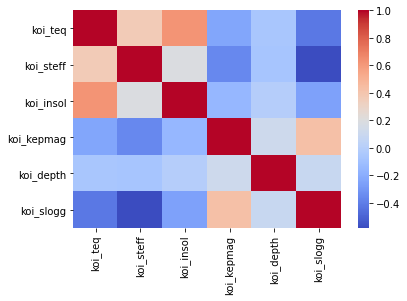

In [53]:
sns.heatmap(data_temperature.corr(),cmap='coolwarm')

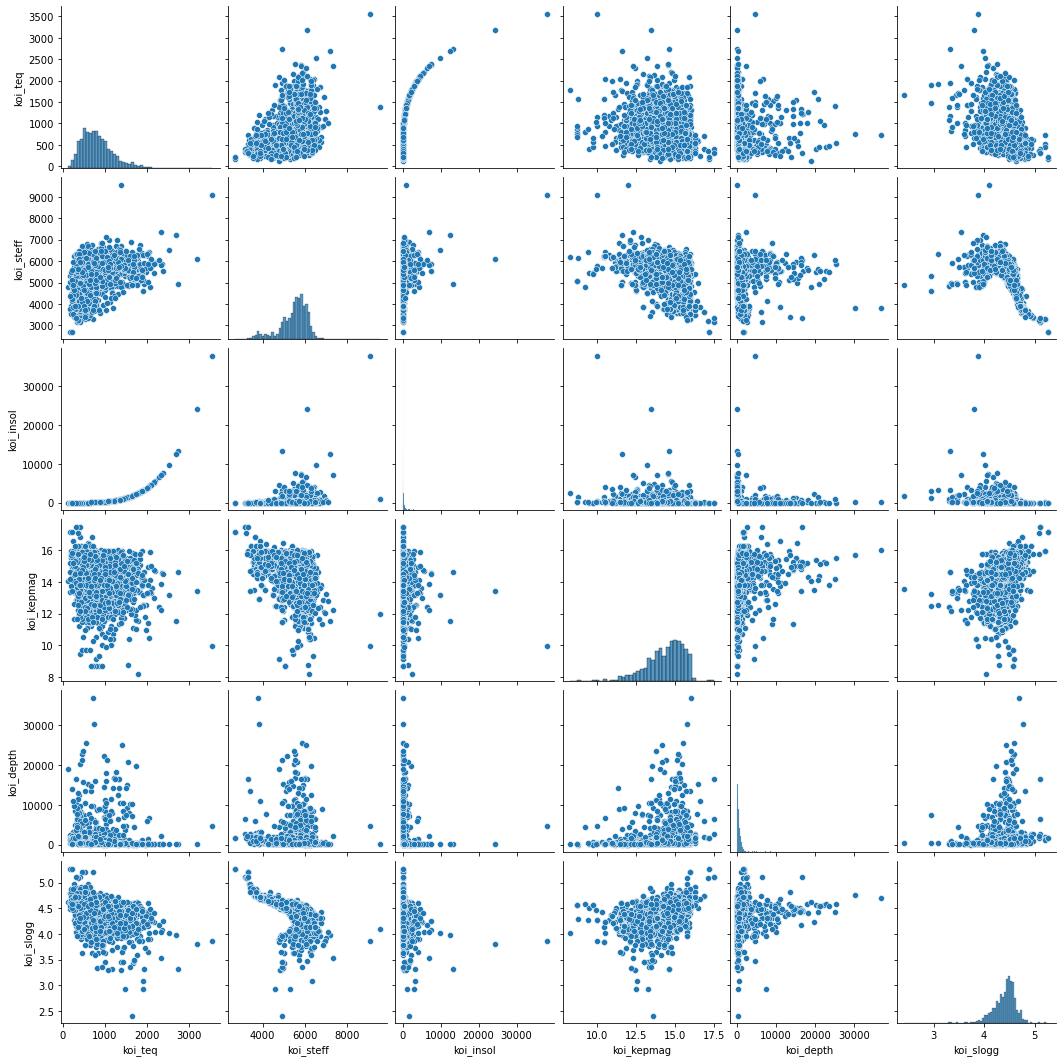

In [133]:
sns.pairplot(data_temperature, hue=None)

In [38]:
data_temperature = pd.DataFrame(data_cc, columns=['kepoi_name','koi_disposition','koi_steff','koi_depth','koi_slogg'])

In [39]:
data_temperature.to_csv(r'C:\\Users\\user\\Downloads\\koi.predictions1.csv.', index = False)

data prepeared for prediction model (koi_depth/koi_slogg) koi_steff/koi_slogg- abstract


In [36]:
data_dimention = pd.DataFrame(data_cc, columns=['kepoi_name','koi_prad','koi_srad','koi_impact'])

In [115]:
data_dimention['prad/impact']=data_dimention['koi_prad']/data_dimention['koi_impact']

In [116]:
data_dimention['srad/impact']=data_dimention['koi_srad']/data_dimention['koi_impact']

In [117]:
decimals = 2    
data_dimention ['prad/impact'] = data_dimention['prad/impact'].apply (lambda x: round(x, decimals))
data_dimention ['srad/impact'] = data_dimention['srad/impact'].apply (lambda x: round(x, decimals))
data_dimention

,kepoi_name,koi_prad,koi_srad,koi_impact,prad/impact,srad/impact
0,K00752.01,2.26,0.927,0.146,15.48,6.35
1,K00752.02,2.83,0.927,0.586,4.83,1.58
4,K00755.01,2.75,1.046,0.701,3.92,1.49
5,K00756.01,3.90,0.972,0.538,7.25,1.81
6,K00756.02,2.77,0.972,0.762,3.64,1.28
...,...,...,...,...,...,...
7658,K00351.07,3.37,1.200,0.943,3.57,1.27
8817,K06863.01,0.95,0.193,0.442,2.15,0.44
8956,K02704.03,2.44,0.189,0.461,5.29,0.41
9014,K07016.01,1.09,0.798,0.059,18.47,13.53


In [120]:
data_dimention[data_dimention['koi_impact']==0]

,kepoi_name,koi_prad,koi_srad,koi_impact,prad/impact,srad/impact
218,K00122.01,3.13,1.411,0.0,inf,inf
642,K01099.01,8.19,1.213,0.0,inf,inf
760,K01257.01,9.40,1.120,0.0,inf,inf
900,K01342.01,1.29,0.969,0.0,inf,inf
2854,K03056.01,1.24,0.799,0.0,inf,inf
3167,K00597.01,3.56,1.439,0.0,inf,inf


In [128]:
data_dimention1 = data_dimention.drop(labels=[218,642,760,900,2854,3167], axis=0)

In [129]:
data_dimention1

,kepoi_name,koi_prad,koi_srad,koi_impact,prad/impact,srad/impact
0,K00752.01,2.26,0.927,0.146,15.48,6.35
1,K00752.02,2.83,0.927,0.586,4.83,1.58
4,K00755.01,2.75,1.046,0.701,3.92,1.49
5,K00756.01,3.90,0.972,0.538,7.25,1.81
6,K00756.02,2.77,0.972,0.762,3.64,1.28
...,...,...,...,...,...,...
7658,K00351.07,3.37,1.200,0.943,3.57,1.27
8817,K06863.01,0.95,0.193,0.442,2.15,0.44
8956,K02704.03,2.44,0.189,0.461,5.29,0.41
9014,K07016.01,1.09,0.798,0.059,18.47,13.53


<AxesSubplot:>

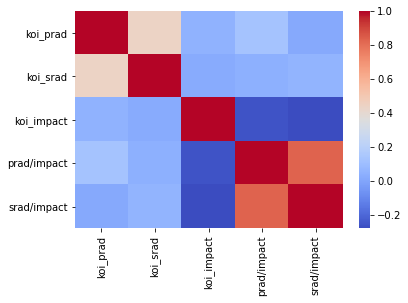

In [130]:
sns.heatmap(data_dimention1.corr(), cmap='coolwarm')

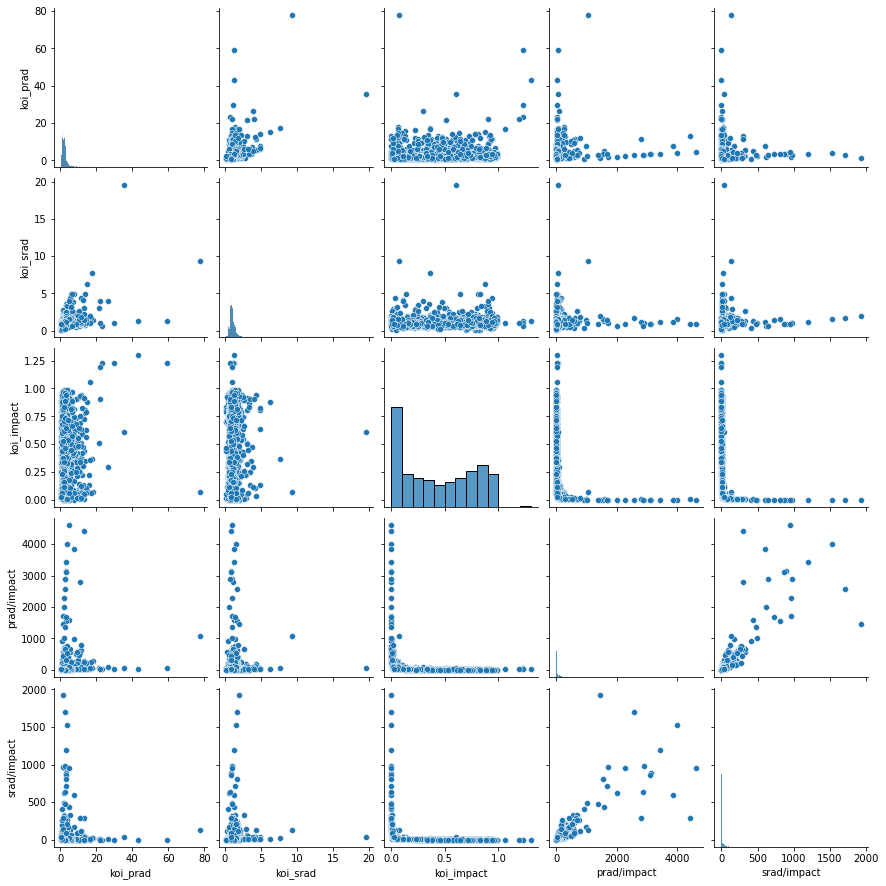

In [131]:
sns.pairplot(data_dimention1, hue=None)

In [132]:
data_dimention1.to_csv(r'C:\\Users\\user\\Downloads\\koi.prediction2.csv.', index = False)

data prepeared for prediction model for evaluate existing parameters (stellar and planetary radus)